In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [4]:
df_min=df[df['8']==1]

In [5]:
df_min.to_csv('pima_minority_train.csv',index=False)
df_min=pd.read_csv('pima_minority_train.csv')

In [6]:
df_majority=df[df['8']==0]
df_majority.to_csv('pima_majority_train.csv',index=False)
df_majority=pd.read_csv('pima_majority_train.csv')

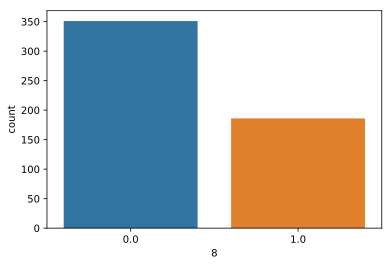

In [7]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,3)#5
print(x.shape)
print(y.shape)

(182, 3, 9)
(182, 9)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
109/109 [==============================] - 4s 39ms/step - loss: 0.2189
Epoch 2/500
109/109 [==============================] - 0s 515us/step - loss: 0.2033
Epoch 3/500
109/109 [==============================] - 0s 476us/step - loss: 0.1875
Epoch 4/500
109/109 [==============================] - 0s 469us/step - loss: 0.1726
Epoch 5/500
109/109 [==============================] - 0s 511us/step - loss: 0.1580
Epoch 6/500
109/109 [==============================] - 0s 502us/step - loss: 0.1443
Epoch 7/500
109/109 [==============================] - 0s 451us/step - loss: 0.1310
Epoch 8/500
109/109 [==============================] - 0s 469us/step - loss: 0.1182
Epoch 9/500
109/109 [==============================] - 0s 488us/step - loss: 0.1056
Epoch 10/500
109/109 [==============================] - 0s 478us/step - loss: 0.0934
Epoch 11/500
109/109 [==============================] - 0s 460us/step - loss: 0.0817
Epoch 12/500
109/109 [==============================] - 0s 542us/step - los

109/109 [==============================] - 0s 626us/step - loss: 0.0257
Epoch 98/500
109/109 [==============================] - 0s 543us/step - loss: 0.0257
Epoch 99/500
109/109 [==============================] - 0s 580us/step - loss: 0.0257
Epoch 100/500
109/109 [==============================] - 0s 524us/step - loss: 0.0257
Epoch 101/500
109/109 [==============================] - 0s 497us/step - loss: 0.0257
Epoch 102/500
109/109 [==============================] - 0s 506us/step - loss: 0.0257
Epoch 103/500
109/109 [==============================] - 0s 524us/step - loss: 0.0257
Epoch 104/500
109/109 [==============================] - 0s 515us/step - loss: 0.0257
Epoch 105/500
109/109 [==============================] - 0s 506us/step - loss: 0.0256
Epoch 106/500
109/109 [==============================] - 0s 653us/step - loss: 0.0256
Epoch 107/500
109/109 [==============================] - 0s 598us/step - loss: 0.0256
Epoch 108/500
109/109 [==============================] - 0s 552us/step

109/109 [==============================] - 0s 589us/step - loss: 0.0245
Epoch 193/500
109/109 [==============================] - 0s 442us/step - loss: 0.0245
Epoch 194/500
109/109 [==============================] - 0s 455us/step - loss: 0.0245
Epoch 195/500
109/109 [==============================] - 0s 442us/step - loss: 0.0245
Epoch 196/500
109/109 [==============================] - 0s 460us/step - loss: 0.0245
Epoch 197/500
109/109 [==============================] - 0s 524us/step - loss: 0.0245
Epoch 198/500
109/109 [==============================] - 0s 405us/step - loss: 0.0245
Epoch 199/500
109/109 [==============================] - 0s 432us/step - loss: 0.0245
Epoch 200/500
109/109 [==============================] - 0s 432us/step - loss: 0.0244
Epoch 201/500
109/109 [==============================] - 0s 554us/step - loss: 0.0244
Epoch 202/500
109/109 [==============================] - 0s 543us/step - loss: 0.0245
Epoch 203/500
109/109 [==============================] - 0s 428us/st

109/109 [==============================] - 0s 635us/step - loss: 0.0237
Epoch 288/500
109/109 [==============================] - 0s 535us/step - loss: 0.0237
Epoch 289/500
109/109 [==============================] - 0s 451us/step - loss: 0.0236
Epoch 290/500
109/109 [==============================] - 0s 520us/step - loss: 0.0237
Epoch 291/500
109/109 [==============================] - 0s 405us/step - loss: 0.0236
Epoch 292/500
109/109 [==============================] - 0s 432us/step - loss: 0.0236
Epoch 293/500
109/109 [==============================] - 0s 428us/step - loss: 0.0236
Epoch 294/500
109/109 [==============================] - 0s 432us/step - loss: 0.0236
Epoch 295/500
109/109 [==============================] - 0s 419us/step - loss: 0.0236
Epoch 296/500
109/109 [==============================] - 0s 465us/step - loss: 0.0236
Epoch 297/500
109/109 [==============================] - 0s 566us/step - loss: 0.0236
Epoch 298/500
109/109 [==============================] - 0s 484us/st

109/109 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 383/500
109/109 [==============================] - 0s 791us/step - loss: 0.0229
Epoch 384/500
109/109 [==============================] - 0s 593us/step - loss: 0.0229
Epoch 385/500
109/109 [==============================] - 0s 662us/step - loss: 0.0229
Epoch 386/500
109/109 [==============================] - 0s 980us/step - loss: 0.0229
Epoch 387/500
109/109 [==============================] - 0s 727us/step - loss: 0.0229
Epoch 388/500
109/109 [==============================] - 0s 745us/step - loss: 0.0229
Epoch 389/500
109/109 [==============================] - 0s 740us/step - loss: 0.0229
Epoch 390/500
109/109 [==============================] - 0s 722us/step - loss: 0.0229
Epoch 391/500
109/109 [==============================] - 0s 773us/step - loss: 0.0229
Epoch 392/500
109/109 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 393/500
109/109 [==============================] - 0s 856us/step -

109/109 [==============================] - 0s 649us/step - loss: 0.0223
Epoch 478/500
109/109 [==============================] - 0s 635us/step - loss: 0.0224
Epoch 479/500
109/109 [==============================] - 0s 607us/step - loss: 0.0224
Epoch 480/500
109/109 [==============================] - 0s 580us/step - loss: 0.0223
Epoch 481/500
109/109 [==============================] - 0s 442us/step - loss: 0.0223
Epoch 482/500
109/109 [==============================] - 0s 423us/step - loss: 0.0223
Epoch 483/500
109/109 [==============================] - 0s 469us/step - loss: 0.0223
Epoch 484/500
109/109 [==============================] - 0s 451us/step - loss: 0.0223
Epoch 485/500
109/109 [==============================] - 0s 460us/step - loss: 0.0224
Epoch 486/500
109/109 [==============================] - 0s 451us/step - loss: 0.0223
Epoch 487/500
109/109 [==============================] - 0s 561us/step - loss: 0.0223
Epoch 488/500
109/109 [==============================] - 0s 524us/st

In [14]:
model.save('7-24-2019-pima.h5')

In [15]:
Xtrain.shape

(109, 3, 9)

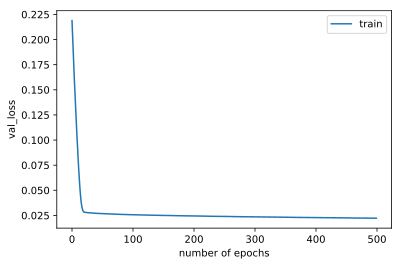

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

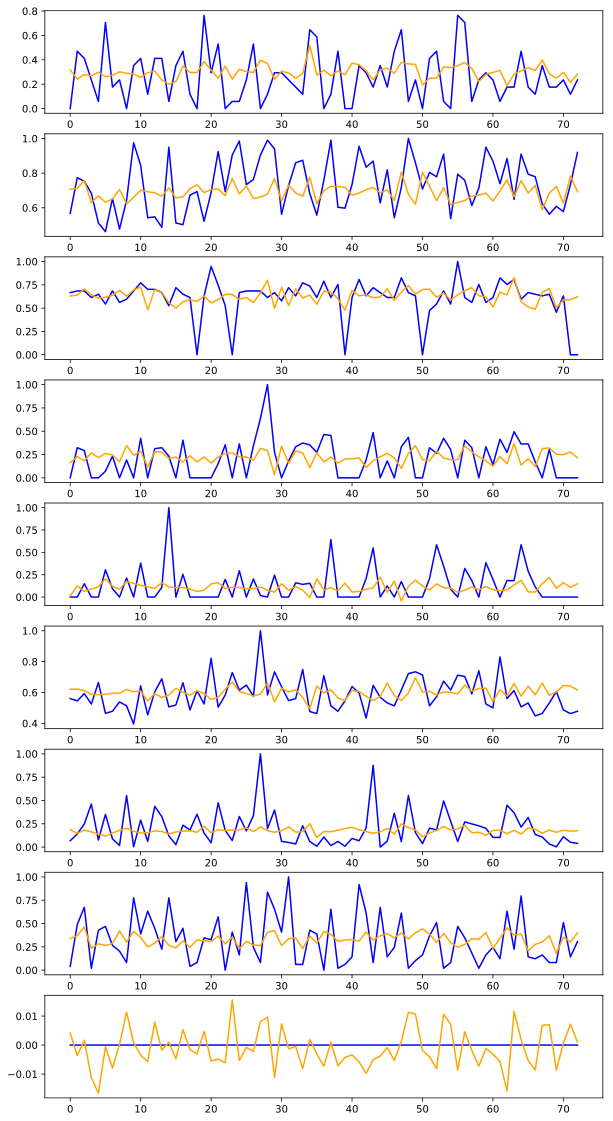

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 3.17314923e-01,  7.07229078e-01,  6.30524874e-01,
         1.63513362e-01,  1.26481391e-02,  6.20637119e-01,
         1.87029153e-01,  3.38921964e-01,  4.12556529e-03],
       [ 2.41776168e-01,  7.12414622e-01,  6.39921904e-01,
         2.27954432e-01,  1.25283301e-01,  6.22105539e-01,
         1.45395309e-01,  3.70667011e-01, -3.64023447e-03],
       [ 2.78730243e-01,  7.57212460e-01,  7.05596745e-01,
         1.82258487e-01,  6.42009079e-02,  6.11583173e-01,
         1.82888553e-01,  4.63661075e-01,  1.66807324e-03],
       [ 2.68585414e-01,  6.30645156e-01,  6.43156588e-01,
         2.67545521e-01,  8.96545053e-02,  5.87781250e-01,
         1.63341388e-01,  2.33783603e-01, -1.13223661e-02],
       [ 2.98922032e-01,  6.68945491e-01,  6.06678307e-01,
         2.16261968e-01,  1.15307957e-01,  5.85540771e-01,
         1.39065236e-01,  2.82730490e-01, -1.66270845e-02],
       [ 2.61664152e-01,  6.31709158e-01,  6.16198480e-01,
         2.62691170e-01,  2.04059556e-01,  5.879968

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

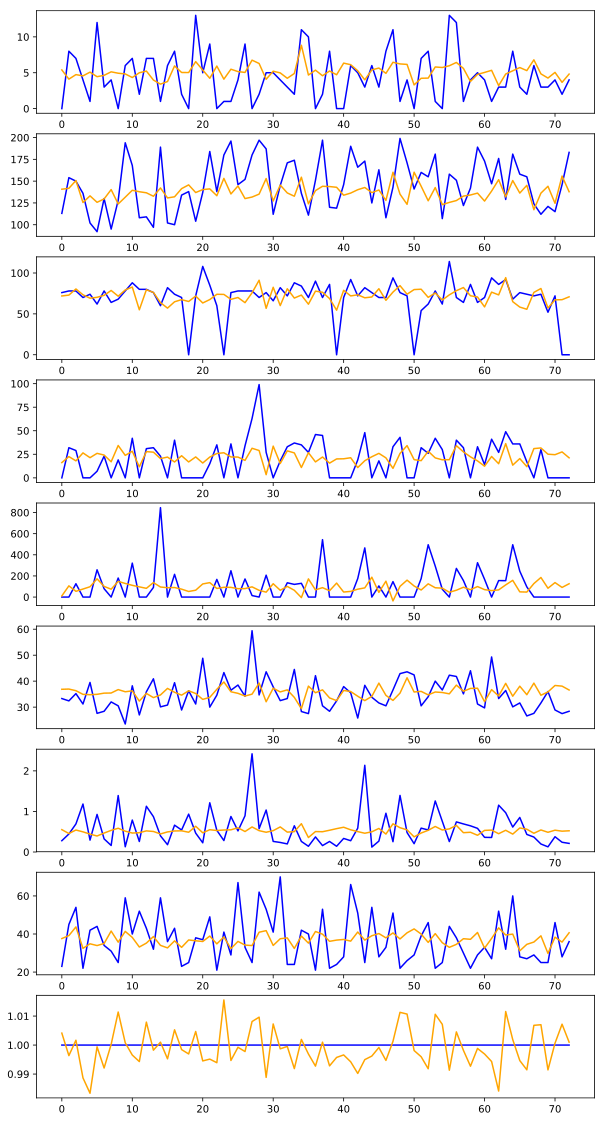

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 3.17314923e-01,  7.07229078e-01,  6.30524874e-01,
         1.63513362e-01,  1.26481391e-02,  6.20637119e-01,
         1.87029153e-01,  3.38921964e-01,  4.12556529e-03],
       [ 2.41776168e-01,  7.12414622e-01,  6.39921904e-01,
         2.27954432e-01,  1.25283301e-01,  6.22105539e-01,
         1.45395309e-01,  3.70667011e-01, -3.64023447e-03],
       [ 2.78730243e-01,  7.57212460e-01,  7.05596745e-01,
         1.82258487e-01,  6.42009079e-02,  6.11583173e-01,
         1.82888553e-01,  4.63661075e-01,  1.66807324e-03],
       [ 2.68585414e-01,  6.30645156e-01,  6.43156588e-01,
         2.67545521e-01,  8.96545053e-02,  5.87781250e-01,
         1.63341388e-01,  2.33783603e-01, -1.13223661e-02],
       [ 2.98922032e-01,  6.68945491e-01,  6.06678307e-01,
         2.16261968e-01,  1.15307957e-01,  5.85540771e-01,
         1.39065236e-01,  2.82730490e-01, -1.66270845e-02],
       [ 2.61664152e-01,  6.31709158e-01,  6.16198480e-01,
         2.62691170e-01,  2.04059556e-01,  5.879968

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)